## Import Dependency

In [224]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, ElasticNet, Lasso
import xgboost as xgb

from sklearn.metrics import root_mean_squared_error

import pickle

## Load Data

In [225]:
df = pd.read_csv(r"C:\Users\nene0\Desktop\Projects\kaggle_Used_Car_Regression\cleaned_train_2024-09-16_20-50-49.csv")

df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,age,hp,engine_liter,cylinder,num_gear
0,MINI,Cooper S Base,213000,Gasoline,Automatic,Yellow,Gray,None reported,Yes,4200,17,172.0,1.6,4.0,6
1,Lincoln,LS V8,143250,Gasoline,Automatic,Silver,Beige,At least 1 accident or damage reported,Yes,4999,22,252.0,3.9,8.0,6
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Automatic,Blue,Gray,None reported,Yes,13900,22,360.0,5.3,8.0,6
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,7,420.0,5.0,8.0,6
4,Mercedes-Benz,Metris Base,7388,Gasoline,Automatic,Black,Beige,None reported,Yes,97500,3,208.0,2.0,4.0,7


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188373 non-null  object 
 1   model         188373 non-null  object 
 2   milage        188373 non-null  int64  
 3   fuel_type     188373 non-null  object 
 4   transmission  188373 non-null  object 
 5   ext_col       188373 non-null  object 
 6   int_col       188373 non-null  object 
 7   accident      188373 non-null  object 
 8   clean_title   188373 non-null  object 
 9   price         188373 non-null  int64  
 10  age           188373 non-null  int64  
 11  hp            188373 non-null  float64
 12  engine_liter  188373 non-null  float64
 13  cylinder      188373 non-null  float64
 14  num_gear      188373 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 21.6+ MB


In [227]:
df['price'].describe()

count    188373.000000
mean      42206.763283
std       49034.762873
min        2000.000000
25%       17000.000000
50%       30775.000000
75%       49883.000000
max      749950.000000
Name: price, dtype: float64

## Preprocessing

### Numeric Feature Scaling

In [228]:
# Separate the target variable.

target_var = df['price']

In [229]:
df.drop(columns=['price', 'num_gear'], inplace=True)

In [230]:
pre_scale_data = df[df.select_dtypes(['float', 'int']).columns]

pre_scale_data

,milage,age,hp,engine_liter,cylinder
0,213000,17,172.0,1.6,4.0
1,143250,22,252.0,3.9,8.0
2,136731,22,360.0,5.3,8.0
3,19500,7,420.0,5.0,8.0
4,7388,3,208.0,2.0,4.0
...,...,...,...,...,...
188368,49000,7,420.0,6.2,8.0
188369,28600,6,385.0,3.0,6.0
188370,13650,3,469.0,4.0,8.0
188371,13895,2,333.0,3.0,6.0


In [231]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(pre_scale_data), columns=pre_scale_data.columns)

In [232]:
pickle.dump(scaler, open("scaler.pickle", "wb"))

In [233]:
scaled_data.head()

,milage,age,hp,engine_liter,cylinder
0,2.957166,1.563313,-1.602993,-1.667211,-1.640379
1,1.556537,2.448261,-0.849770,0.086883,1.213316
2,1.425631,2.448261,0.167082,1.154592,1.213316
3,-0.928450,-0.206584,0.732000,0.925797,1.213316
4,-1.171668,-0.914543,-1.264043,-1.362151,-1.640379


### Log Transform

In [234]:
target_var.skew()

5.547478797658133

<Axes: >

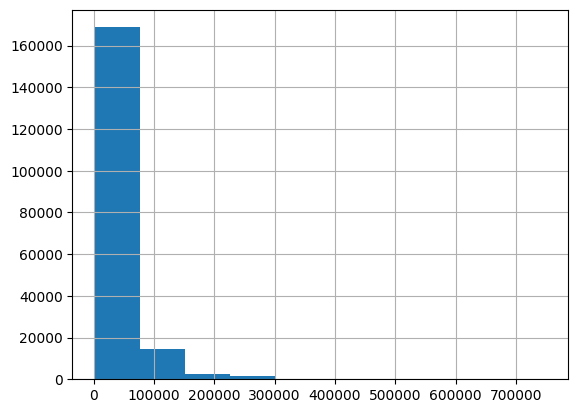

In [235]:
target_var.hist()

In [236]:
np.log(target_var).skew()

0.0176145846469097

In [237]:
log_target = np.log(target_var)

In [238]:
np.exp(log_target)

0          4200.0
1          4999.0
2         13900.0
3         45000.0
4         97500.0
           ...   
188368    27500.0
188369    30000.0
188370    86900.0
188371    84900.0
188372    28995.0
Name: price, Length: 188373, dtype: float64

### Categorical Encoding

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188373 entries, 0 to 188372
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         188373 non-null  object 
 1   model         188373 non-null  object 
 2   milage        188373 non-null  int64  
 3   fuel_type     188373 non-null  object 
 4   transmission  188373 non-null  object 
 5   ext_col       188373 non-null  object 
 6   int_col       188373 non-null  object 
 7   accident      188373 non-null  object 
 8   clean_title   188373 non-null  object 
 9   age           188373 non-null  int64  
 10  hp            188373 non-null  float64
 11  engine_liter  188373 non-null  float64
 12  cylinder      188373 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 18.7+ MB


In [240]:
df['accident'].unique(), df['clean_title'].unique()

(array(['None reported', 'At least 1 accident or damage reported',
        'Unknown'], dtype=object),
 array(['Yes', 'Unknown'], dtype=object))

In [241]:
# Change 'None Reported' and 'Unknown' = 0, 'At least 1 accident or damage reported' = 1
# Change 'Yes' = 1, 'Unknown' = 0

df['accident'] =  df['accident'].map(lambda x: 1 if x=='At least 1 accident or damage reported' else 0)
df['clean_title'] =  df['clean_title'].map(lambda x: 1 if x=='Yes' else 0)

In [242]:
df.head()

,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,age,hp,engine_liter,cylinder
0,MINI,Cooper S Base,213000,Gasoline,Automatic,Yellow,Gray,0,1,17,172.0,1.6,4.0
1,Lincoln,LS V8,143250,Gasoline,Automatic,Silver,Beige,1,1,22,252.0,3.9,8.0
2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,Automatic,Blue,Gray,0,1,22,360.0,5.3,8.0
3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,0,1,7,420.0,5.0,8.0
4,Mercedes-Benz,Metris Base,7388,Gasoline,Automatic,Black,Beige,0,1,3,208.0,2.0,4.0


In [243]:
df.describe(include='object')

,brand,model,fuel_type,transmission,ext_col,int_col
count,188373,188373,188373,188373,188373,188373
unique,57,1897,7,10,317,152
top,Ford,F-150 XLT,Gasoline,Automatic,Black,Black
freq,23012,2944,166179,147710,48646,107628


In [244]:
df.drop(columns=['ext_col', 'int_col', 'model'], inplace=True)

In [245]:
pre_enc_data = df[df.select_dtypes(['object']).columns]

pre_enc_data

,brand,fuel_type,transmission
0,MINI,Gasoline,Automatic
1,Lincoln,Gasoline,Automatic
2,Chevrolet,E85 Flex Fuel,Automatic
3,Genesis,Gasoline,Transmission w/Dual Shift Mode
4,Mercedes-Benz,Gasoline,Automatic
...,...,...,...
188368,Cadillac,Gasoline,Transmission w/Dual Shift Mode
188369,Mercedes-Benz,Gasoline,Automatic
188370,Mercedes-Benz,Gasoline,Automatic
188371,Audi,Gasoline,Automatic


In [246]:
encoded_data = pd.get_dummies(pre_enc_data, dtype='int')

encoded_data.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,transmission_Automated Manual,transmission_Automatic,transmission_Automatic with Auto-Shift,transmission_Automatic with Overdrive,transmission_CVT,transmission_DCT Automatic,transmission_Manual,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Merge DataFrames

In [247]:
scaled_data.head()

,milage,age,hp,engine_liter,cylinder
0,2.957166,1.563313,-1.602993,-1.667211,-1.640379
1,1.556537,2.448261,-0.849770,0.086883,1.213316
2,1.425631,2.448261,0.167082,1.154592,1.213316
3,-0.928450,-0.206584,0.732000,0.925797,1.213316
4,-1.171668,-0.914543,-1.264043,-1.362151,-1.640379


In [248]:
encoded_data.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,transmission_Automated Manual,transmission_Automatic,transmission_Automatic with Auto-Shift,transmission_Automatic with Overdrive,transmission_CVT,transmission_DCT Automatic,transmission_Manual,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [249]:
train = pd.concat([encoded_data, scaled_data], axis=1)

train.head()

,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,brand_Cadillac,brand_Chevrolet,...,transmission_DCT Automatic,transmission_Manual,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,milage,age,hp,engine_liter,cylinder
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2.957166,1.563313,-1.602993,-1.667211,-1.640379
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1.556537,2.448261,-0.849770,0.086883,1.213316
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1.425631,2.448261,0.167082,1.154592,1.213316
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-0.928450,-0.206584,0.732000,0.925797,1.213316
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.171668,-0.914543,-1.264043,-1.362151,-1.640379


In [250]:
train.isna().sum().sum()

0

In [251]:
pickle.dump(train.columns, open("slected_fetures.pickle", "wb"))

## Model Training

### Train Test Split

In [252]:
X = train
y = log_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150698, 79), (37675, 79), (150698,), (37675,))

### Model

In [256]:
xgbr = xgb.XGBRegressor(n_estimators=1500, learning_rate=0.01)
xgbr.fit(X_train, y_train)
xgbr_pred = xgbr.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(xgbr_pred))

41584.57214916461

In [132]:
# root_mean_squared_error(np.exp(y_test), np.exp(xgbr_pred)) / target_var.median()

In [257]:
pickle.dump(xgbr, open("xgboost_model.pickle", "wb"))

42480 <- before removing the model.
- n_estimators=1000, learning_rate=0.01: 41633.83542641763
- n_estimators=1500, learning_rate=0.01: 41563.40110724915
- n_estimators=1000, learning_rate=0.01: 41721.66544004208 <- without num_gear, with model
- n_estimators=1500, learning_rate=0.01: 41584.57214916461 <- without num_gear, model

In [136]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(ridge_pred))

42797.65730494374

41962

In [138]:
en = ElasticNet()
en.fit(X_train, y_train)
en_pred = en.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(en_pred))

50670.09995173315

50670

#### Lasso - Selecting Features

In [139]:
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

root_mean_squared_error(np.exp(y_test), np.exp(lasso_pred))

42845.07043524405

In [140]:
feature_importance = np.abs(lasso.coef_)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [141]:
importance_df[importance_df['Importance'] > 0]

,Feature,Importance
25,brand_Lamborghini,0.629160
2,brand_Aston,0.405293
46,brand_Rolls-Royce,0.399480
5,brand_Bentley,0.390316
35,brand_McLaren,0.389669
13,brand_Ferrari,0.357627
74,milage,0.309486
75,age,0.309004
43,brand_Porsche,0.298713
66,transmission_Automatic with Auto-Shift,0.181430
